## Analysing Experiments For Training Neural Network on MNIST Using Metaflow

In [10]:
from metaflow import Metaflow, Flow, get_metadata,Run,metadata
import matplotlib.pyplot as plt
metadata('/Users/valaydave/Documents/Code-Workspace/ASU-Projects/CSE598-ML-Data-Systems/ML-Systems-Project/metaflow-kube-demo/')
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/valaydave/Documents/Code-Workspace/ASU-Projects/CSE598-ML-Data-Systems/ML-Systems-Project/metaflow-kube-demo/


In [11]:
print(Metaflow().flows) # Helping me find all the Main Flows/Experiments I have conducted

[Flow('GPUMINSTTensorFlow'), Flow('MNISTNeuralNetworkExperimentationFlow')]


In [13]:
flow = Flow('GPUMINSTTensorFlow') # Prints the Runs in Each Flow. 
for run in flow:
    print(run)

Run('GPUMINSTTensorFlow/1584775679983490')
Run('GPUMINSTTensorFlow/1584775544453297')
Run('GPUMINSTTensorFlow/1584773094617848')
Run('GPUMINSTTensorFlow/1584772910076567')


## Analysing Individual Experiments

In [14]:
run = Flow('MNISTNeuralNetworkExperimentationFlow').latest_successful_run # Get the Latest Run that was completely done.
print("The Models were Trained with :",run.data.num_training_examples," Examples") 

The Models were Trained with : 20000  Examples


In [15]:
run_history = run.data.history

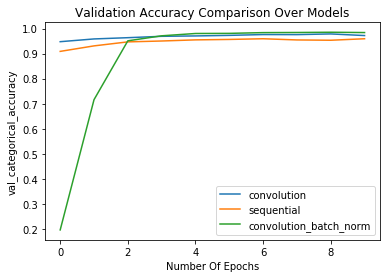

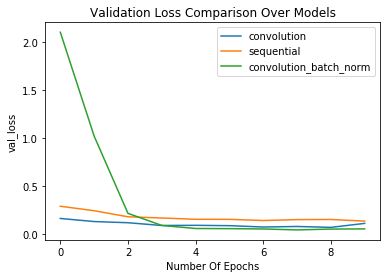

In [16]:
fig_1 = plt.figure()
legend = []
for key in run_history:
    x_data = [i for i in range(len(run_history[key]['acc']))]
    plt.plot(x_data,run_history[key]['val_categorical_accuracy'])
    legend.append(key)

plt.title('Validation Accuracy Comparison Over Models')
plt.ylabel('val_categorical_accuracy')
plt.xlabel('Number Of Epochs')
plt.legend(legend,loc='best')

fig_2 = plt.figure()
for key in run_history:
    x_data = [i for i in range(len(run_history[key]['acc']))]
    plt.plot(x_data,run_history[key]['val_loss'])

plt.title('Validation Loss Comparison Over Models')
plt.ylabel('val_loss')
plt.xlabel('Number Of Epochs')
plt.legend(legend,loc='best')
plt.show()
